In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import zscore
import warnings
import joblib

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv(r"cardekho_imputated.csv")

In [4]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [6]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [7]:
for d in df.columns:
    print(f"Value Counts of column {d}")
    print(df[d].nunique())
    print("="*35)

Value Counts of column Unnamed: 0
15411
Value Counts of column car_name
121
Value Counts of column brand
32
Value Counts of column model
120
Value Counts of column vehicle_age
24
Value Counts of column km_driven
3688
Value Counts of column seller_type
3
Value Counts of column fuel_type
5
Value Counts of column transmission_type
2
Value Counts of column mileage
411
Value Counts of column engine
110
Value Counts of column max_power
342
Value Counts of column seats
8
Value Counts of column selling_price
1086


In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [10]:
num_features = df.select_dtypes(exclude='O')

In [11]:
num_features

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,9,120000,19.70,796,46.30,5,120000
1,5,20000,18.90,1197,82.00,5,550000
2,11,60000,17.00,1197,80.00,5,215000
3,9,37000,20.92,998,67.10,5,226000
4,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000
15407,2,18000,17.50,1373,91.10,7,925000
15408,6,67000,21.14,1498,103.52,5,425000
15409,5,3800000,16.00,2179,140.00,7,1225000


In [12]:
cat_features = df.select_dtypes(include='O')
cat_features

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
15407,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
15408,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
15409,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


In [13]:
corr=num_features.corr()

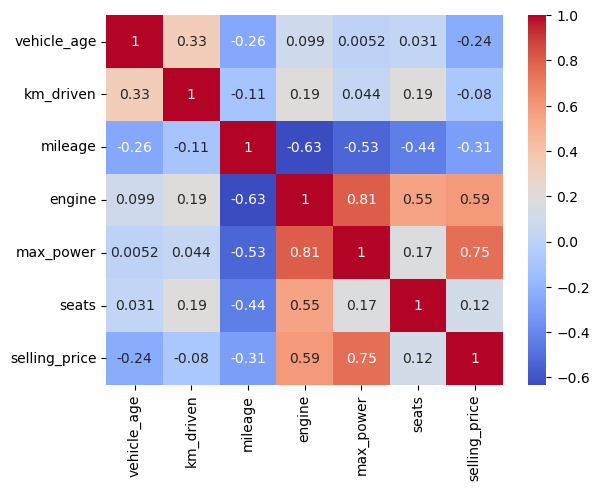

In [14]:
sns.heatmap(corr,annot=True,cmap='coolwarm');

In [15]:
type(num_features)

pandas.core.frame.DataFrame

In [16]:
z_score = np.abs(zscore(num_features))
outliers = num_features[(z_score>3).any(axis=1)]
print(f"Total Outliers Detected {len(outliers)}")

Total Outliers Detected 994


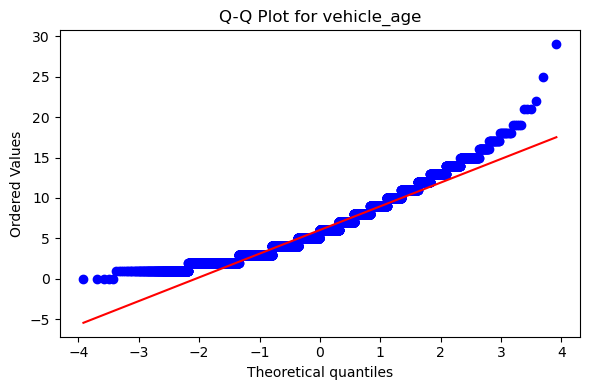

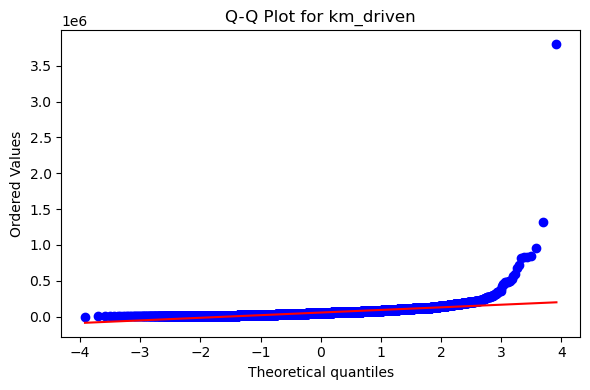

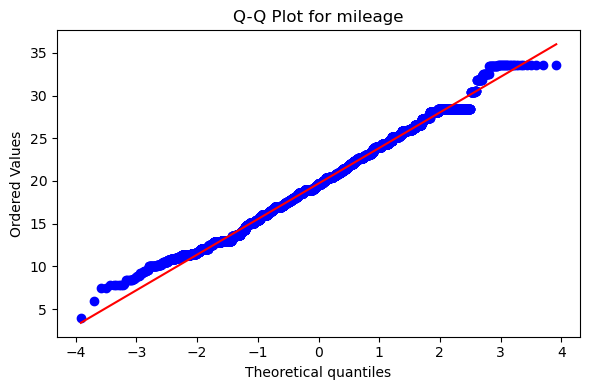

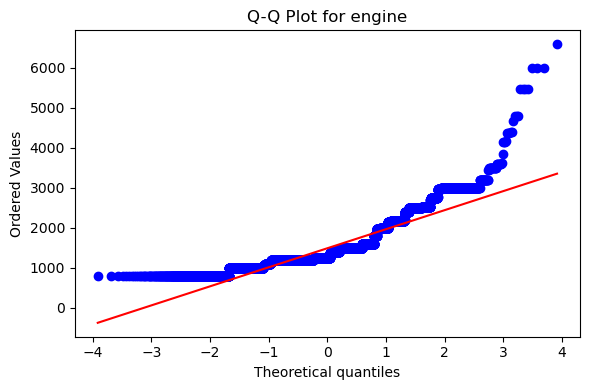

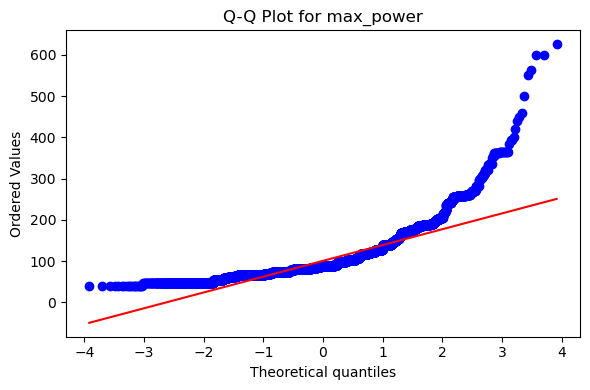

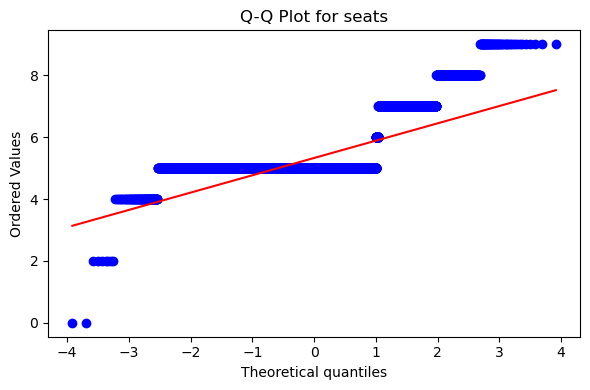

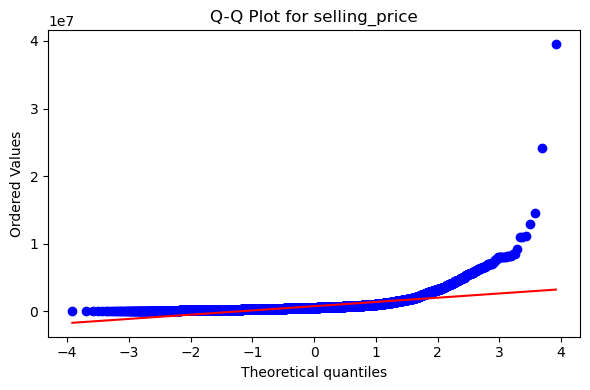

In [17]:
from scipy import stats
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.tight_layout()
    plt.show()

In [18]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [19]:
df.drop(columns=["brand","model"],inplace=True)

In [20]:
df.tail()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Hyundai i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,Honda City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


# MODEL BUILDING

In [21]:
X = df.drop("selling_price",axis=1)
y = df["selling_price"]

In [22]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [23]:
num_transform = StandardScaler()
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
CT = ColumnTransformer(
    [
        ("OrdinalEncoder",oe,cat_features),
        ("StandardScaler",num_transform,num_features)
    ],remainder='passthrough'
)

In [24]:
CT

ColumnTransformer(remainder='passthrough',
                  transformers=[('OrdinalEncoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 Index(['car_name', 'seller_type', 'fuel_type', 'transmission_type'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object'))])

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=237)

In [26]:
X_train = CT.fit_transform(X_train)

In [27]:
X_test = CT.transform(X_test)

In [28]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,24.0,1.0,1.0,1.0,-1.343191,-0.574566,1.831375,0.020979,-0.044312,-0.404819
1,64.0,0.0,1.0,1.0,-1.009694,-0.420012,1.828990,-0.460508,-0.620431,-0.404819
2,111.0,0.0,4.0,1.0,-0.342701,-0.306413,-0.775422,-0.556805,-0.622770,-0.404819
3,59.0,0.0,1.0,1.0,-0.342701,-0.184526,-1.030616,0.982028,0.455553,2.063607
4,71.0,0.0,1.0,1.0,-0.342701,0.693063,1.144497,-0.460508,-0.281262,2.063607
...,...,...,...,...,...,...,...,...,...,...
11553,39.0,0.0,4.0,1.0,1.991775,0.229891,0.152341,-0.558731,-0.505816,-0.404819
11554,112.0,0.0,1.0,1.0,0.324292,-0.013884,0.147571,0.020979,0.062585,-0.404819
11555,35.0,0.0,4.0,1.0,1.658278,0.449289,-0.429598,-0.772512,-0.898784,-0.404819
11556,55.0,1.0,1.0,1.0,2.325271,-0.988983,-1.459914,1.995078,-0.877732,2.063607


In [29]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR":SVR()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 560012.4416
- Mean Absolute Error: 268176.8513
- R2 Score: 0.6161
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 497625.5732
- Mean Absolute Error: 273949.8329
- R2 Score: 0.6685


Lasso
Model performance for Training set
- Root Mean Squared Error: 560012.4416
- Mean Absolute Error: 268176.2096
- R2 Score: 0.6161
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 497625.2080
- Mean Absolute Error: 273949.0625
- R2 Score: 0.6685


Ridge
Model performance for Training set
- Root Mean Squared Error: 560012.4509
- Mean Absolute Error: 268158.3338
- R2 Score: 0.6161
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 497627.6576
- Mean Absolute Error: 273933.2262
- R2 Score: 0.6685


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 355559.5385
- Mean 

In [31]:
knn_params = {"n_neighbors": [2, 3,5, 10,15, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10,20],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000,2000]}


In [32]:
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params,50,5),
                   ("RF", RandomForestRegressor(), rf_params,85,5)
                   
                   ]

In [33]:
randomcv_models

[('KNN',
  KNeighborsRegressor(),
  {'n_neighbors': [2, 3, 5, 10, 15, 20, 40, 50]},
  50,
  5),
 ('RF',
  RandomForestRegressor(),
  {'max_depth': [5, 8, 15, None, 10, 20],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000, 2000]},
  85,
  5)]

In [34]:
model_param={}
for name, model, params,n_iter,cv in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=n_iter,
                                   cv=cv,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 85 candidates, totalling 425 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 2}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 20}


In [35]:
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=2000, min_samples_split=2, max_features=5, max_depth=15, 
                                                     n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=2, n_jobs=-1)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 142033.9034
- Mean Absolute Error: 54106.9405
- R2 Score: 0.9753
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 211469.4435
- Mean Absolute Error: 97141.3745
- R2 Score: 0.9401


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 215316.0241
- Mean Absolute Error: 62871.3932
- R2 Score: 0.9432
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 265053.6617
- Mean Absolute Error: 110038.6874
- R2 Score: 0.9060




In [36]:
for name, model in models.items():
    model.fit(X_train, y_train)
    filename = name.replace(" ", "_").lower() + ".pkl"  # e.g., 'random_forest.pkl'
    joblib.dump(model, filename)
    print(f"{name} saved as {filename}")   

Random Forest Regressor saved as random_forest_regressor.pkl
K-Neighbors Regressor saved as k-neighbors_regressor.pkl


In [37]:
joblib.dump(CT, 'preprocessor.pkl')

['preprocessor.pkl']

In [38]:
import joblib
joblib.dump(model, 'random_forest_regressor.pkl', compress=3)


['random_forest_regressor.pkl']